# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #1a3d52; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #ffe81c; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Regression Analysis: Simple and Multiple linear </p>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
matplotlib.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/algeria-five-indicators/Four_Indicators.csv
/kaggle/input/algeria-five-indicators/Users_Internet.csv


<a id='1'></a>
# 1 | Data Preparation

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [2]:
users_df = pd.read_csv('/kaggle/input/algeria-five-indicators/Users_Internet.csv')
users_df

,Year,Algeria,Maghreb_union,Arab_world,European_Union,The_World
0,1990,0.000000,0.000000,0.000000,0.066859,0.048825
1,1991,0.000000,0.000000,0.000000,0.145457,0.078811
2,1992,0.000000,0.000000,0.000000,0.272238,0.125186
3,1993,0.000000,0.000000,0.000865,0.415228,0.179007
4,1994,0.000361,0.001548,0.002878,0.785177,0.360508
5,1995,0.001769,0.003334,0.014686,1.514385,0.683082
6,1996,0.001739,0.007006,0.040273,2.623169,1.326567
7,1997,0.010268,0.015947,0.141948,4.799629,2.042697
8,1998,0.020239,0.062215,0.283812,7.688773,3.140580
9,1999,0.199524,0.445939,0.644800,13.633010,4.632903


In [3]:
users_df.describe()

,Year,Algeria,Maghreb_union,Arab_world,European_Union,The_World
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005.500000,16.345217,17.188939,19.821006,43.865465,21.501974
std,9.380832,21.651908,19.782401,22.742559,32.465609,19.673776
min,1990.000000,0.000000,0.000000,0.000000,0.066859,0.048825
25%,1997.750000,0.017746,0.050648,0.248346,6.966487,2.866109
50%,2005.500000,6.609964,8.058553,10.102039,50.452270,16.550541
75%,2013.250000,24.250000,29.851000,34.846586,73.983434,36.207138
max,2021.000000,70.770000,62.881632,76.309077,86.970941,63.071348


In [4]:
users_df.set_index('Year', inplace=True)
users_df

,Algeria,Maghreb_union,Arab_world,European_Union,The_World
Year,,,,,
1990,0.000000,0.000000,0.000000,0.066859,0.048825
1991,0.000000,0.000000,0.000000,0.145457,0.078811
1992,0.000000,0.000000,0.000000,0.272238,0.125186
1993,0.000000,0.000000,0.000865,0.415228,0.179007
1994,0.000361,0.001548,0.002878,0.785177,0.360508
1995,0.001769,0.003334,0.014686,1.514385,0.683082
1996,0.001739,0.007006,0.040273,2.623169,1.326567
1997,0.010268,0.015947,0.141948,4.799629,2.042697
1998,0.020239,0.062215,0.283812,7.688773,3.140580


<a id='1'></a>
# 2 | Making Charts

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>

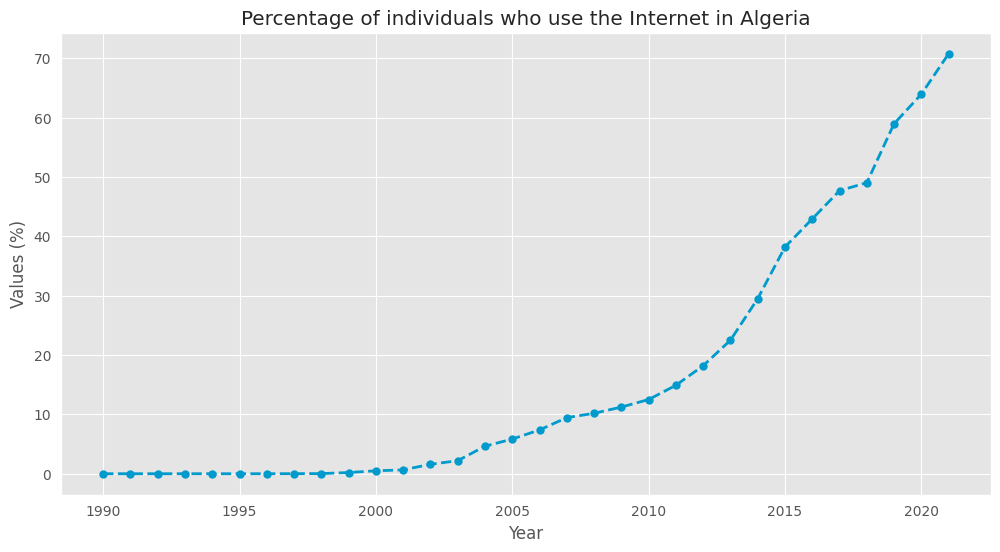

In [5]:
plt.figure(figsize=(12,6))
plt.title('Percentage of individuals who use the Internet in Algeria')
plt.xlabel('Year')
plt.ylabel(r'Values (%)')
users_df.Algeria.plot(kind='line', color='#009ACD', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

The percentage of individuals who use the Internet out of the total population in Algeria between the years 1990 and 2021 has been constantly increasing over the years, reaching its highest value in 2021 at 70.77%.

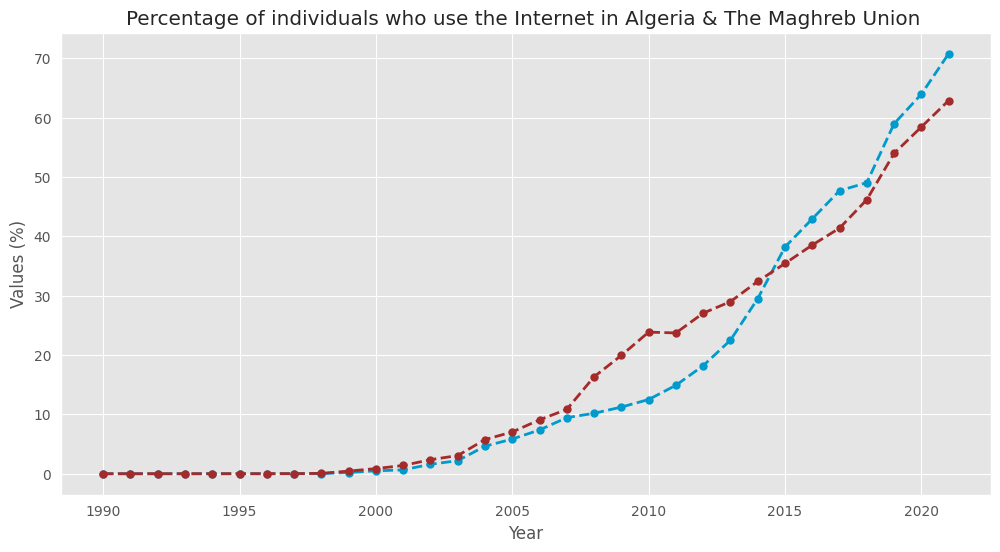

In [6]:
plt.figure(figsize=(12,6))
plt.title('Percentage of individuals who use the Internet in Algeria & The Maghreb Union ')
plt.xlabel('Year')
plt.ylabel(r'Values (%)')
users_df.Algeria.plot(kind='line', color='#009ACD', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);
users_df.Maghreb_union.plot(kind='line', color='brown', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

The percentage of individuals using the Internet out of the total population in [The Maghreb Union](http://en.wikipedia.org/wiki/Arab_Maghreb_Union) was higher than its counterpart in Algeria until 2015, when the percentage of Algerians using the Internet out of the total population exceeded its counterpart in the Maghreb Union.

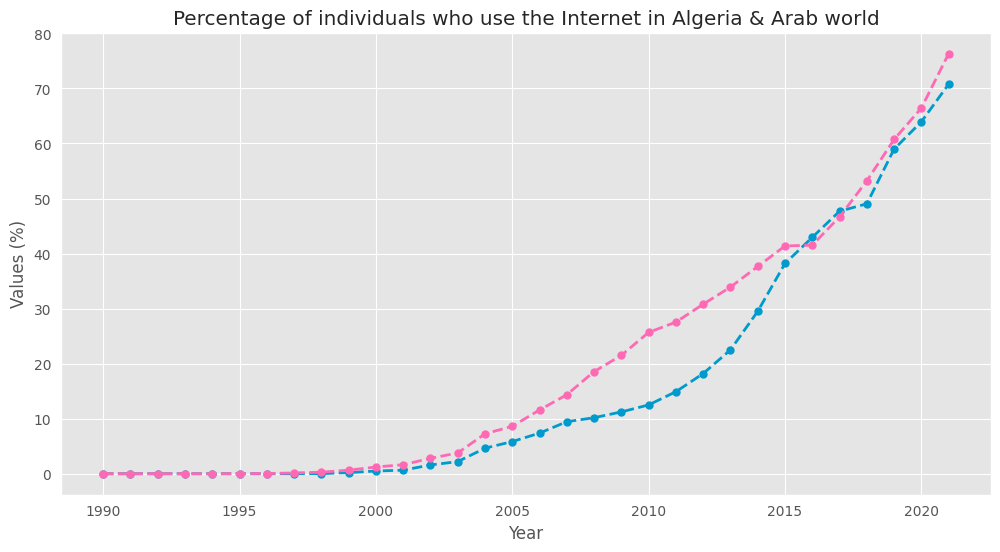

In [7]:
plt.figure(figsize=(12,6))
plt.title('Percentage of individuals who use the Internet in Algeria & Arab world')
plt.xlabel('Year')
plt.ylabel(r'Values (%)')
users_df.Algeria.plot(kind='line', color='#009ACD', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);
users_df.Arab_world.plot(kind='line', color='hotpink', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

The percentage of individuals who use the Internet out of the total population in [the Arab world](https://en.wikipedia.org/wiki/Arab_world) has remained ahead of the same percentage in Algeria, but the difference between them has decreased by about half, that is, from more than 12.5% ​​in 2010 to less than 6% in 2021.

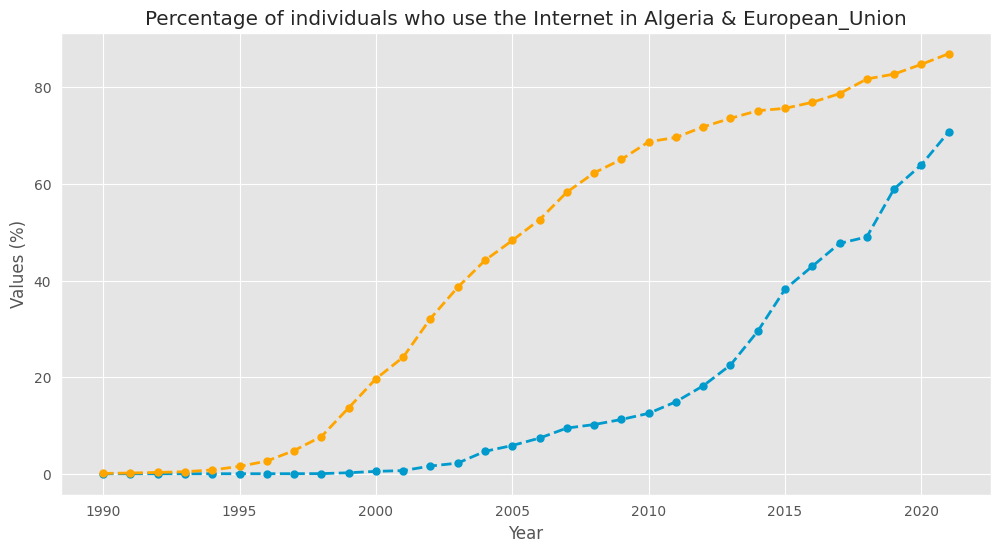

In [8]:
plt.figure(figsize=(12,6))
plt.title('Percentage of individuals who use the Internet in Algeria & European_Union')
plt.xlabel('Year')
plt.ylabel(r'Values (%)')
users_df.Algeria.plot(kind='line', color='#009ACD', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);
users_df.European_Union.plot(kind='line', color='orange', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

The continued huge increase in the percentage of individuals who use the Internet out of the total population in the European Union over the same percentage in Algeria, but the gap between them has decreased by about a third, that is, from more than 56% in 2010 to approximately 16% in 2021.

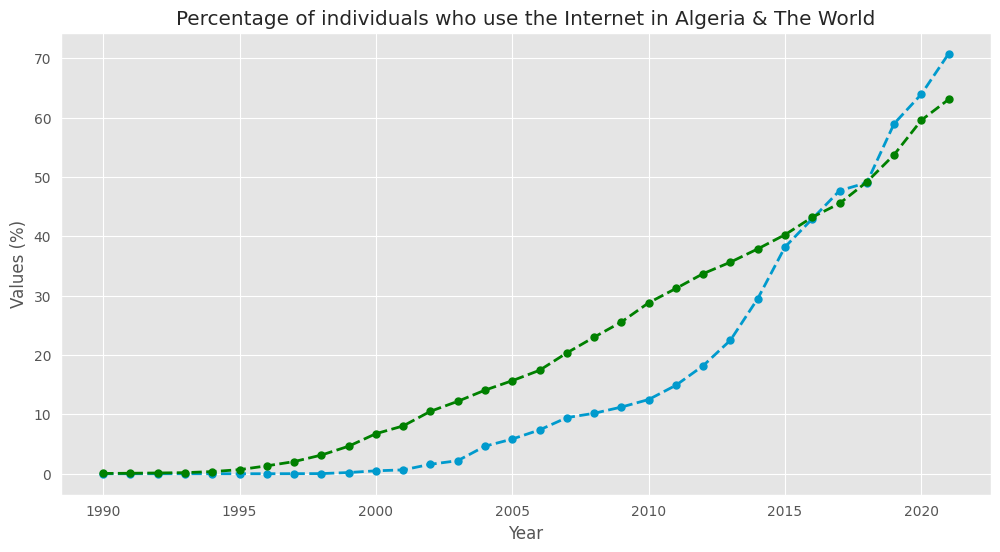

In [9]:
plt.figure(figsize=(12,6))
plt.title('Percentage of individuals who use the Internet in Algeria & The World')
plt.xlabel('Year')
plt.ylabel(r'Values (%)')
users_df.Algeria.plot(kind='line', color='#009ACD', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);
users_df.The_World.plot(kind='line', color='green', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

As for the percentage of individuals who use the Internet out of the total population in the world, it was higher than its counterpart in Algeria until after the year 2016, when the percentage of Algerians who use the Internet out of the total population became higher than its counterpart in the world.

<a id='1'></a>
# 3 | Extracting relationships

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>

To what extent is the proportion of individuals who use the Internet out of the total population in Algeria related to indicators such as:

 * Total population?
 * Fixed phone subscriptions?
 * Mobile phone subscriptions?
 * GDP per capita?

In [10]:
Indic_df = pd.read_csv('/kaggle/input/algeria-five-indicators/Four_Indicators.csv')
Indic_df

,Year,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1990,0.000000,25518074,812000,470,2431.551360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.000000,26133905,883120,4781,1749.286087,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.000000,26748303,962247,4781,1794.623507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.000000,27354327,1068094,4781,1825.875097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.000361,27937006,1122409,1348,1522.825203,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,0.001769,28478022,1176316,4691,1466.544680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,0.001739,28984634,1278142,11700,1619.532412,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997,0.010268,29476031,1400343,17400,1634.467410,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,0.020239,29924668,1477000,18000,1610.302978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,0.199524,30346083,1600000,72000,1602.864915,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Indic_df.describe()

,Year,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
count,32.000000,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2005.500000,16.345217,3.402847e+07,2.533123e+06,1.997168e+07,3154.423049,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.380832,21.651908,5.444793e+06,1.211562e+06,1.999630e+07,1413.127958,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,0.000000,2.551807e+07,8.120000e+05,4.700000e+02,1466.544680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1997.750000,0.017746,2.981251e+07,1.457836e+06,1.785000e+04,1773.927637,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2005.500000,6.609964,3.319588e+07,2.574082e+06,1.732965e+07,3242.740677,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.250000,24.250000,3.819051e+07,3.166520e+06,4.044469e+07,4144.149662,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021.000000,70.770000,4.417797e+07,5.097059e+06,4.715426e+07,5610.733282,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Indic_df.dropna(how='all', axis=1, inplace=True)
display(Indic_df)

,Year,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
0,1990,0.000000,25518074,812000,470,2431.551360
1,1991,0.000000,26133905,883120,4781,1749.286087
2,1992,0.000000,26748303,962247,4781,1794.623507
3,1993,0.000000,27354327,1068094,4781,1825.875097
4,1994,0.000361,27937006,1122409,1348,1522.825203
5,1995,0.001769,28478022,1176316,4691,1466.544680
6,1996,0.001739,28984634,1278142,11700,1619.532412
7,1997,0.010268,29476031,1400343,17400,1634.467410
8,1998,0.020239,29924668,1477000,18000,1610.302978
9,1999,0.199524,30346083,1600000,72000,1602.864915


In [13]:
Indic_df.set_index('Year', inplace=True)
Indic_df

,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
Year,,,,,
1990,0.000000,25518074,812000,470,2431.551360
1991,0.000000,26133905,883120,4781,1749.286087
1992,0.000000,26748303,962247,4781,1794.623507
1993,0.000000,27354327,1068094,4781,1825.875097
1994,0.000361,27937006,1122409,1348,1522.825203
1995,0.001769,28478022,1176316,4691,1466.544680
1996,0.001739,28984634,1278142,11700,1619.532412
1997,0.010268,29476031,1400343,17400,1634.467410
1998,0.020239,29924668,1477000,18000,1610.302978


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #1a3d52; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #ffe81c; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Regression Analysis: Simple linear </p>

<a id='1'></a>
## Regression Analysis: Simple linear
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>

### 1 | Users Percentage vs Total Population

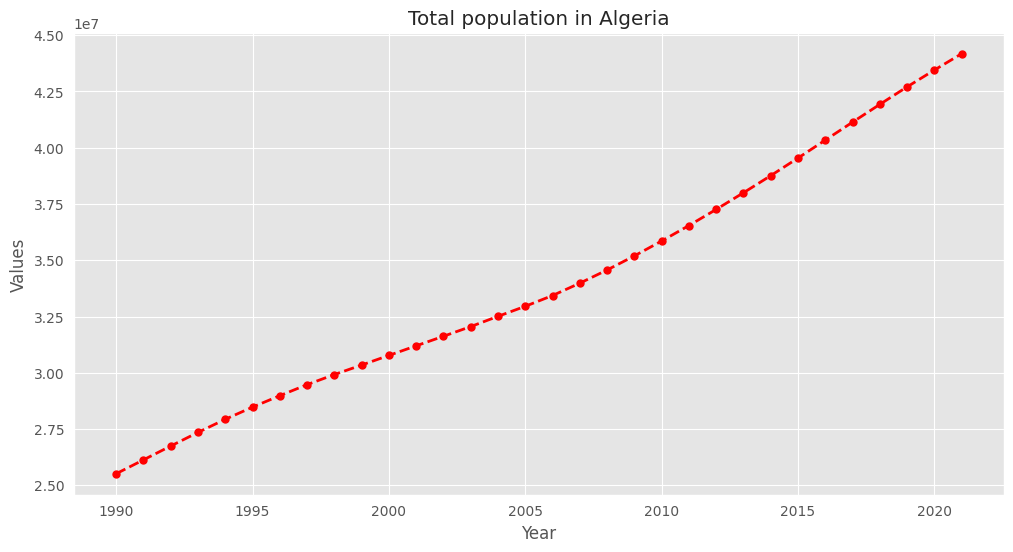

In [14]:
plt.figure(figsize=(12,6))
plt.title('Total population in Algeria')
plt.xlabel('Year')
plt.ylabel('Values')
Indic_df.Total_population.plot(kind='line', color='r', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

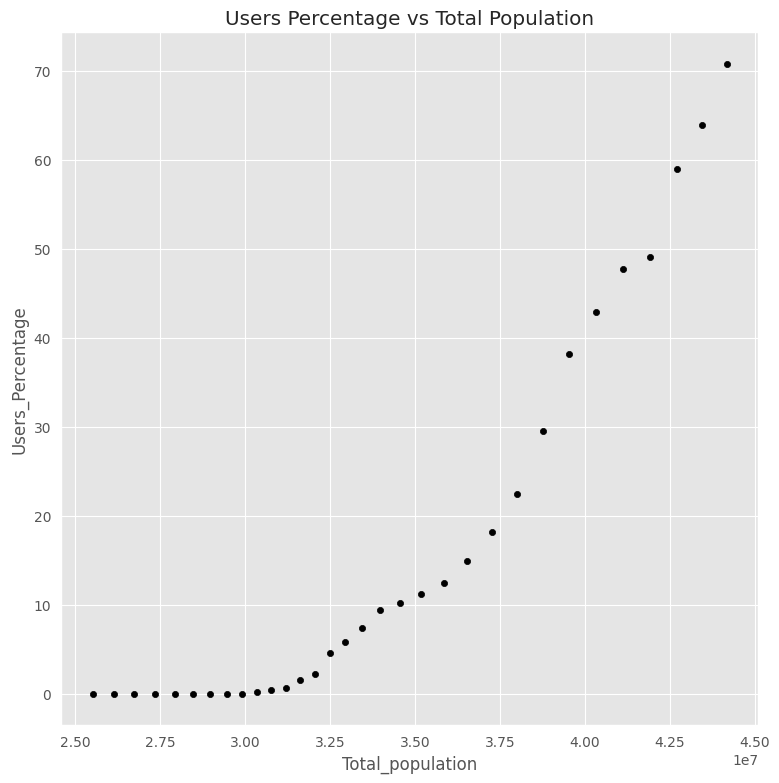

In [15]:
Indic_df.plot(kind="scatter",
           x="Total_population",
           y="Users_Percentage",
           figsize=(9,9),
           color="black");
plt.title('Users Percentage vs Total Population')
plt.show()

In [16]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(Indic_df["Total_population"]), 
                     y = Indic_df["Users_Percentage"])

# Check trained model y-intercept
print("Y-intercept:")
print(regression_model.intercept_)
print("-------------------------")

# Check trained model coefficients
print("Model Coefficient:")
print(regression_model.coef_)
print("-------------------------")

# Check Score
print("Score:")
regression_model.score(X = pd.DataFrame(Indic_df["Total_population"]), 
                     y = Indic_df["Users_Percentage"])

Y-intercept:
-108.68753628401305
-------------------------
Model Coefficient:
[3.67435754e-06]
-------------------------
Score:


0.8537550487287726

In [17]:
# train prediction 
train_prediction = regression_model.predict(X = pd.DataFrame(Indic_df["Total_population"]))

# Actual - prediction = residuals
residuals = Indic_df["Users_Percentage"] - train_prediction

print ("Residuals")
residuals.describe()

Residuals


count    3.200000e+01
mean    -1.254552e-14
std      8.280120e+00
min     -1.068650e+01
25%     -6.744732e+00
50%     -1.930727e+00
75%      5.430497e+00
max      1.713188e+01
Name: Users_Percentage, dtype: float64

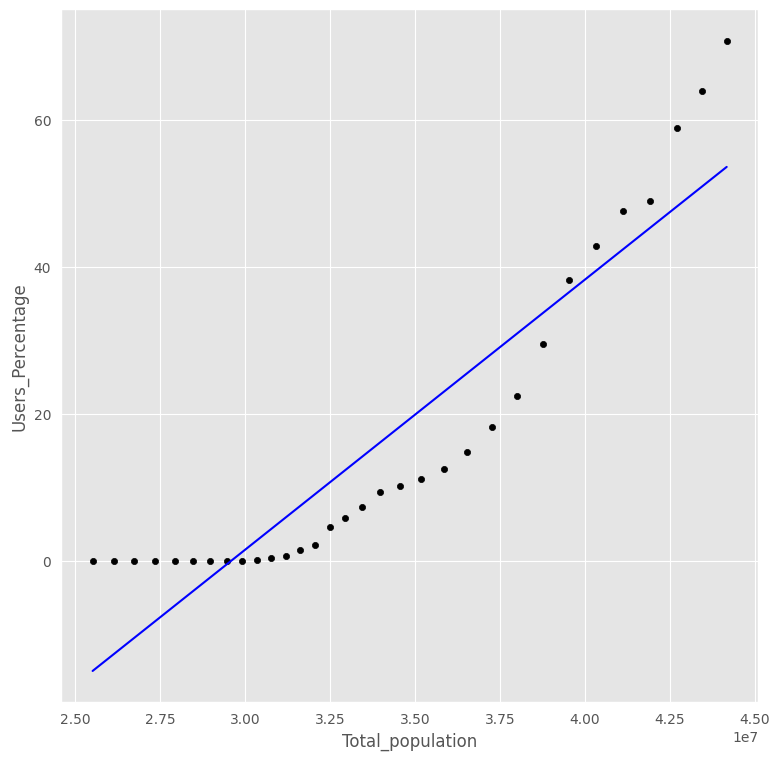

In [18]:
Indic_df.plot(kind="scatter",
           x="Total_population",
           y="Users_Percentage",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(Indic_df["Total_population"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="b");

* The nature of the relationship is linear, very strong, with a rate of 85%. It can be expressed as follows:

**Useres Percentage = $-108.69 + [3.67435754e-06] *(total population)$**

* Whenever the total population in Algeria increases by 1 person, the percentage of individuals who use the Internet out of the total population increases by 0.00000367%.


### 2 | Users Percentage vs Fixed Telephone Subscriptions

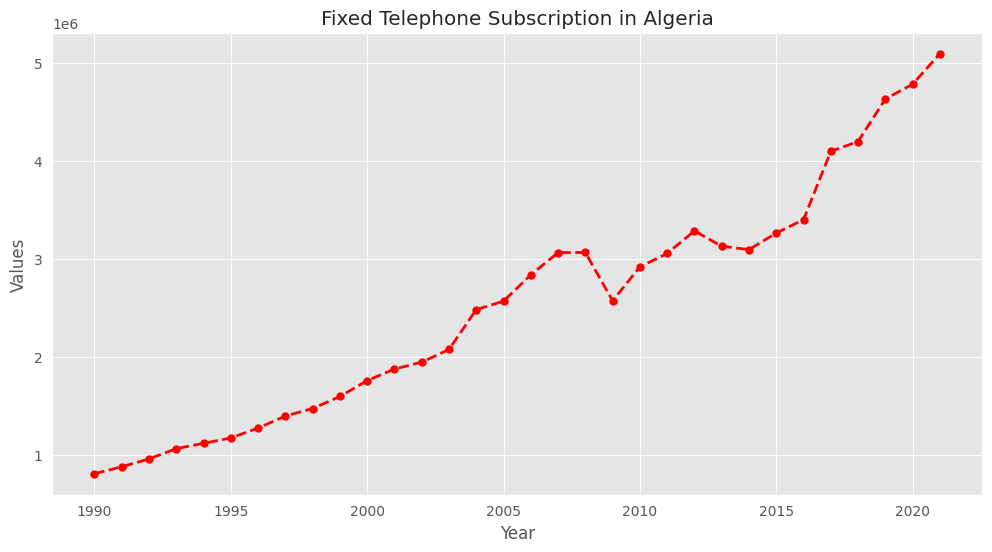

In [19]:
plt.figure(figsize=(12,6))
plt.title('Fixed Telephone Subscription in Algeria')
plt.xlabel('Year')
plt.ylabel('Values')
Indic_df.Fixed_telephone_subscriptions.plot(kind='line', color='r', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

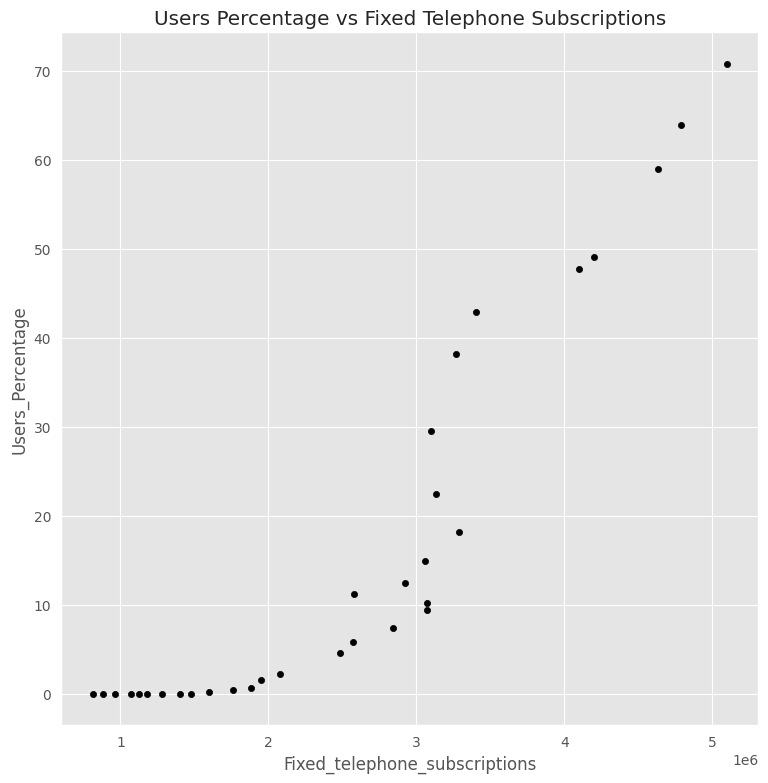

In [20]:
Indic_df.plot(kind="scatter",
           x="Fixed_telephone_subscriptions",
           y="Users_Percentage",
           figsize=(9,9),
           color="black");
plt.title('Users Percentage vs Fixed Telephone Subscriptions')
plt.show()

In [21]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(Indic_df["Fixed_telephone_subscriptions"]), 
                     y = Indic_df["Users_Percentage"])

# Check trained model y-intercept
print("Y-intercept:")
print(regression_model.intercept_)
print("-------------------------")

# Check trained model coefficients
print("Model Coefficient:")
print(regression_model.coef_)
print("-------------------------")

# Check Score
print("Score:")
regression_model.score(X = pd.DataFrame(Indic_df["Fixed_telephone_subscriptions"]), 
                     y = Indic_df["Users_Percentage"])

Y-intercept:
-24.767870824823213
-------------------------
Model Coefficient:
[1.62302003e-05]
-------------------------
Score:


0.8247959819941855

In [22]:
# train prediction 
train_prediction = regression_model.predict(X = pd.DataFrame(Indic_df["Fixed_telephone_subscriptions"]))

# Actual - prediction = residuals
residuals = Indic_df["Users_Percentage"] - train_prediction

print ("Residuals")
residuals.describe()

Residuals


count    3.200000e+01
mean     1.942890e-15
std      9.062921e+00
min     -1.558183e+01
25%     -7.586606e+00
50%      1.433198e+00
75%      7.701303e+00
max      1.281158e+01
Name: Users_Percentage, dtype: float64

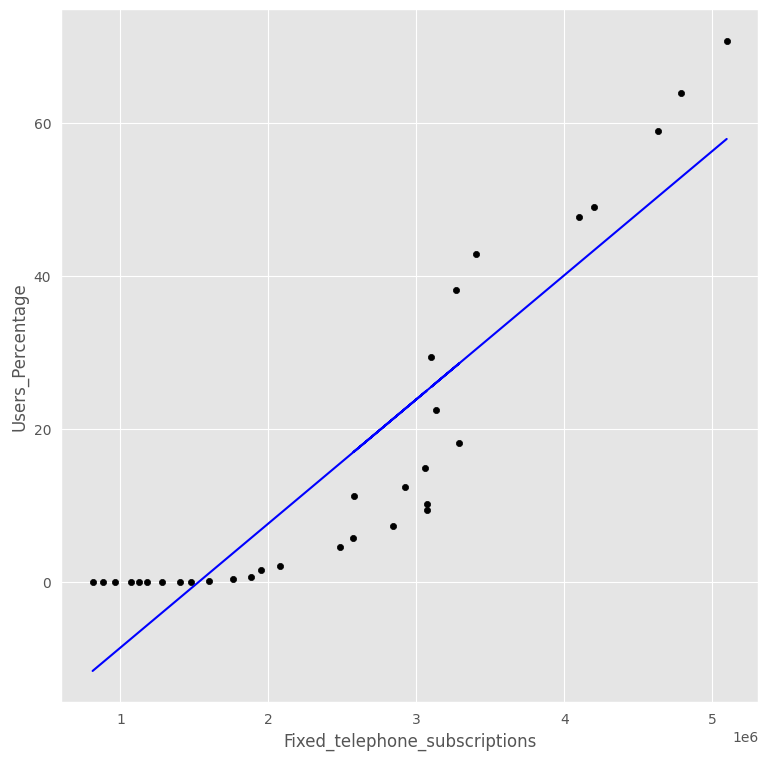

In [23]:
Indic_df.plot(kind="scatter",
           x="Fixed_telephone_subscriptions",
           y="Users_Percentage",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(Indic_df["Fixed_telephone_subscriptions"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="b");

* The nature of the relationship is linear, very strong, with a rate of 82%. It can be expressed as follows:

**Useres Percentage = $-24.77 + [1.62302003e-05]*(Fixed Telephone Subscriptions)$**

* Whenever the Fixed Telephone Subscriptions in Algeria increases by 1 person, the percentage of individuals who use the Internet out of the total population increases by 0.0000162%.


### 3 |  Users Percentage vs Mobile Phone Subscriptions

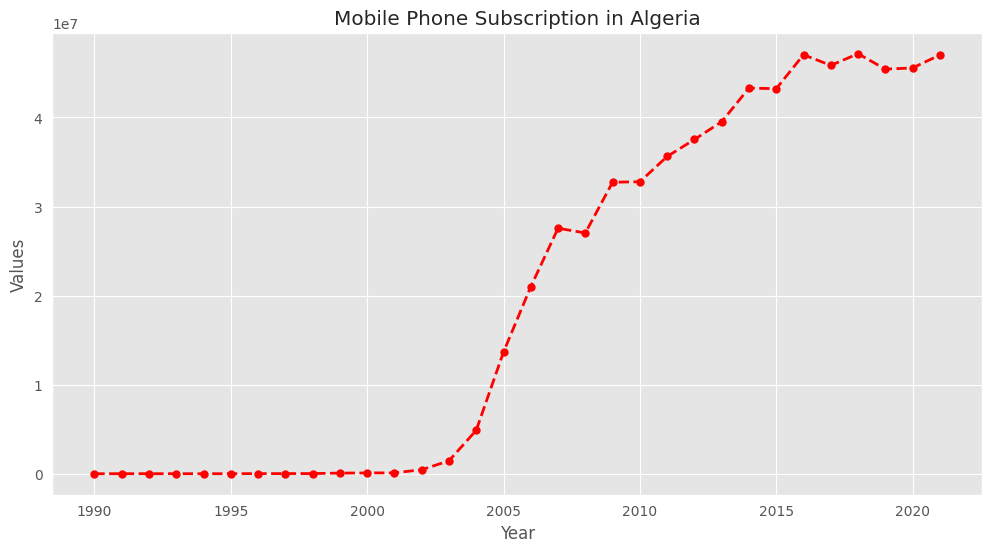

In [24]:
plt.figure(figsize=(12,6))
plt.title('Mobile Phone Subscription in Algeria')
plt.xlabel('Year')
plt.ylabel('Values')
Indic_df.Mobile_phone_subscriptions.plot(kind='line', color='r', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

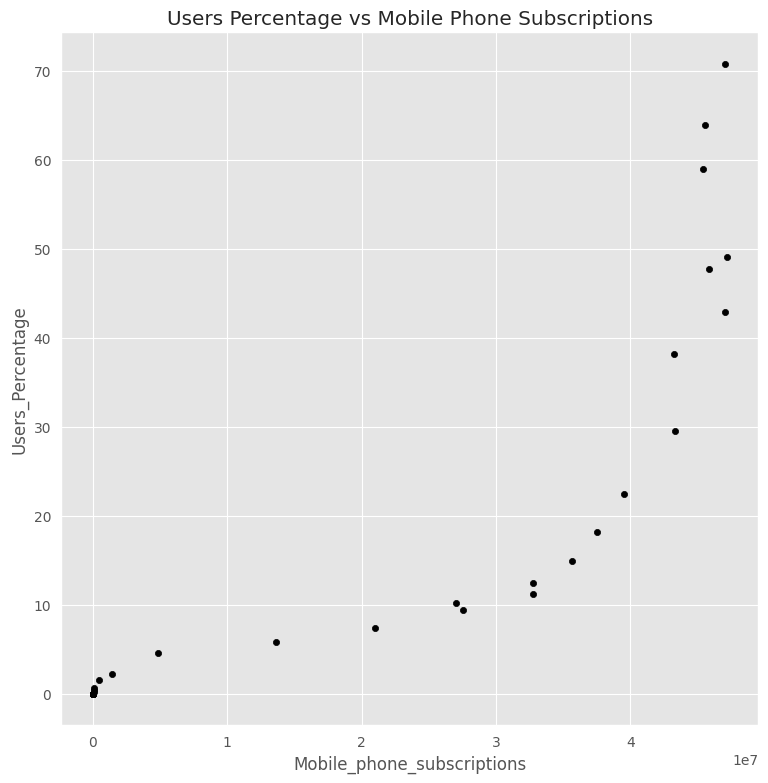

In [25]:
Indic_df.plot(kind="scatter",
           x="Mobile_phone_subscriptions",
           y="Users_Percentage",
           figsize=(9,9),
           color="black");
plt.title('Users Percentage vs Mobile Phone Subscriptions')
plt.show()

In [26]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(Indic_df["Mobile_phone_subscriptions"]), 
                     y = Indic_df["Users_Percentage"])

# Check trained model y-intercept
print("Y-intercept:")
print(regression_model.intercept_)
print("-------------------------")

# Check trained model coefficients
print("Model Coefficient:")
print(regression_model.coef_)
print("-------------------------")

# Check Score
print("Score:")
regression_model.score(X = pd.DataFrame(Indic_df["Mobile_phone_subscriptions"]), 
                     y = Indic_df["Users_Percentage"])

Y-intercept:
-2.3421834332351494
-------------------------
Model Coefficient:
[9.3569499e-07]
-------------------------
Score:


0.7467504293160402

In [27]:
# train prediction 
train_prediction = regression_model.predict(X = pd.DataFrame(Indic_df["Mobile_phone_subscriptions"]))

# Actual - prediction = residuals
residuals = Indic_df["Users_Percentage"] - train_prediction

print ("Residuals")
residuals.describe()

Residuals


count    32.000000
mean      0.000000
std      10.896086
min     -17.052949
25%      -8.986154
50%       2.337710
75%       2.788746
max      29.119775
Name: Users_Percentage, dtype: float64

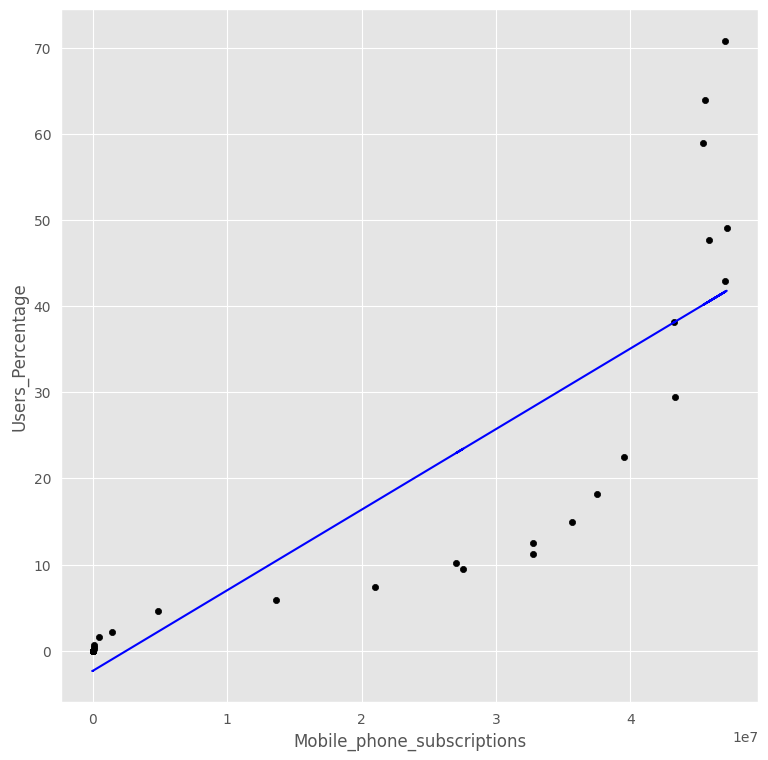

In [28]:
Indic_df.plot(kind="scatter",
           x="Mobile_phone_subscriptions",
           y="Users_Percentage",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(Indic_df["Mobile_phone_subscriptions"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="b");

* The nature of the relationship is linear, strong, with a rate of 75%. It can be expressed as follows:

**Useres Percentage = $-2.34 + [9.3569499e-07]*(Mobile Phone Subscriptions)$**

* Whenever the Mobile Phone Subscriptions in Algeria increases by 1 person, the percentage of individuals who use the Internet out of the total population increases by 0.000000936%.

### 4 | Users Percentage vs GDP per Capita (current US_$)

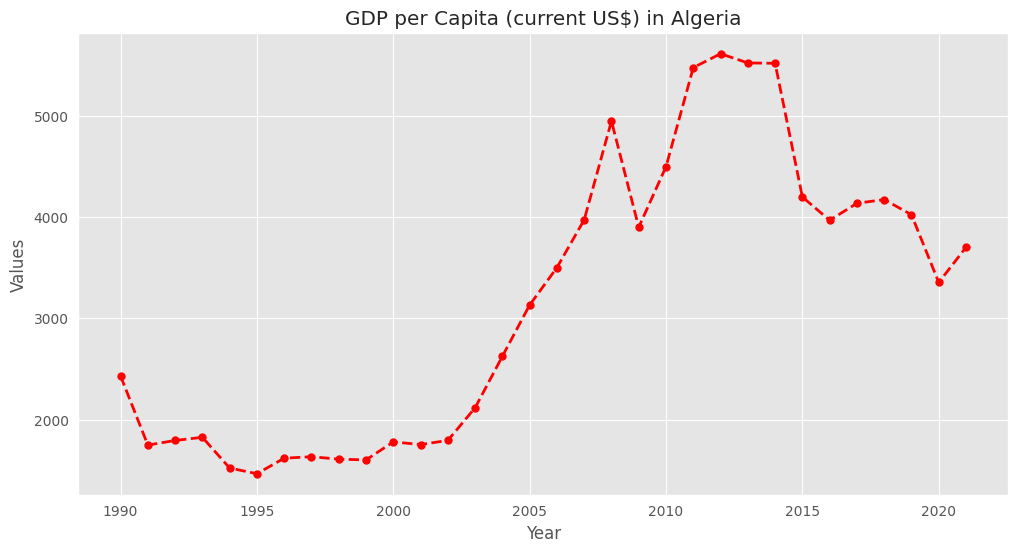

In [29]:
plt.figure(figsize=(12,6))
plt.title(r'GDP per Capita (current US$) in Algeria')
plt.xlabel('Year')
plt.ylabel('Values')
Indic_df.GDP_per_capita_current_US_Dollar.plot(kind='line', color='r', marker='o',
         linestyle='dashed', linewidth=2, markersize=5);

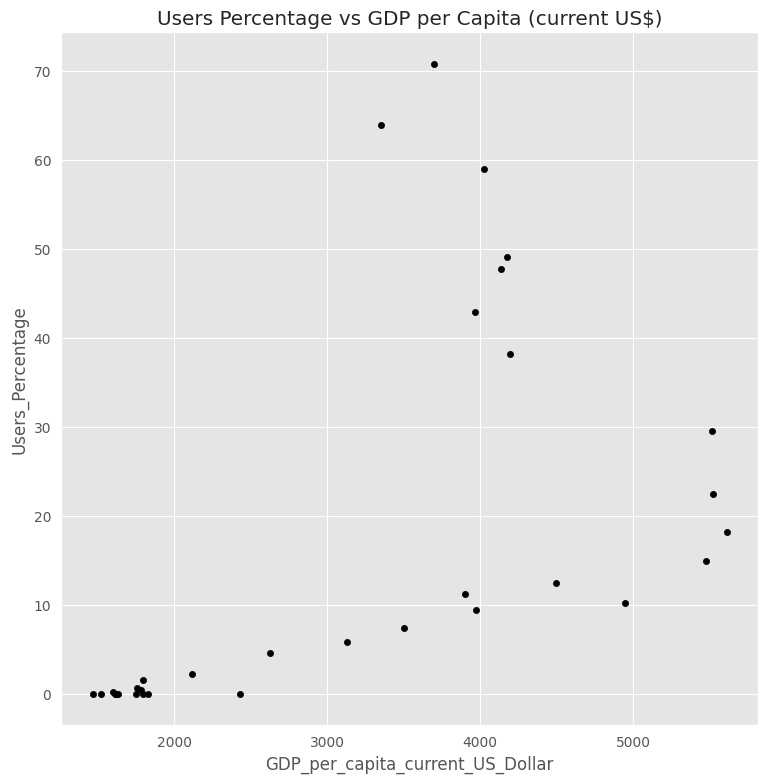

In [30]:
Indic_df.plot(kind="scatter",
           x="GDP_per_capita_current_US_Dollar",
           y="Users_Percentage",
           figsize=(9,9),
           color="black");
plt.title(r'Users Percentage vs GDP per Capita (current US$)')
plt.show()

In [31]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(Indic_df["GDP_per_capita_current_US_Dollar"]), 
                     y = Indic_df["Users_Percentage"])

# Check trained model y-intercept
print("Y-intercept:")
print(regression_model.intercept_)
print("-------------------------")

# Check trained model coefficients
print("Model Coefficient:")
print(regression_model.coef_)
print("-------------------------")

# Check Score
print("Score:")
regression_model.score(X = pd.DataFrame(Indic_df["GDP_per_capita_current_US_Dollar"]), 
                     y = Indic_df["Users_Percentage"])

Y-intercept:
-10.192212684888759
-------------------------
Model Coefficient:
[0.00841277]
-------------------------
Score:


0.30147303786675306

In [32]:
# train prediction 
train_prediction = regression_model.predict(X = pd.DataFrame(Indic_df["GDP_per_capita_current_US_Dollar"]))

# Actual - prediction = residuals
residuals = Indic_df["Users_Percentage"] - train_prediction

print ("Residuals")
residuals.describe()

Residuals


count    3.200000e+01
mean     1.776357e-15
std      1.809622e+01
min     -2.124208e+01
25%     -1.057393e+01
50%     -4.409049e+00
75%     -2.499881e+00
max      4.983232e+01
Name: Users_Percentage, dtype: float64

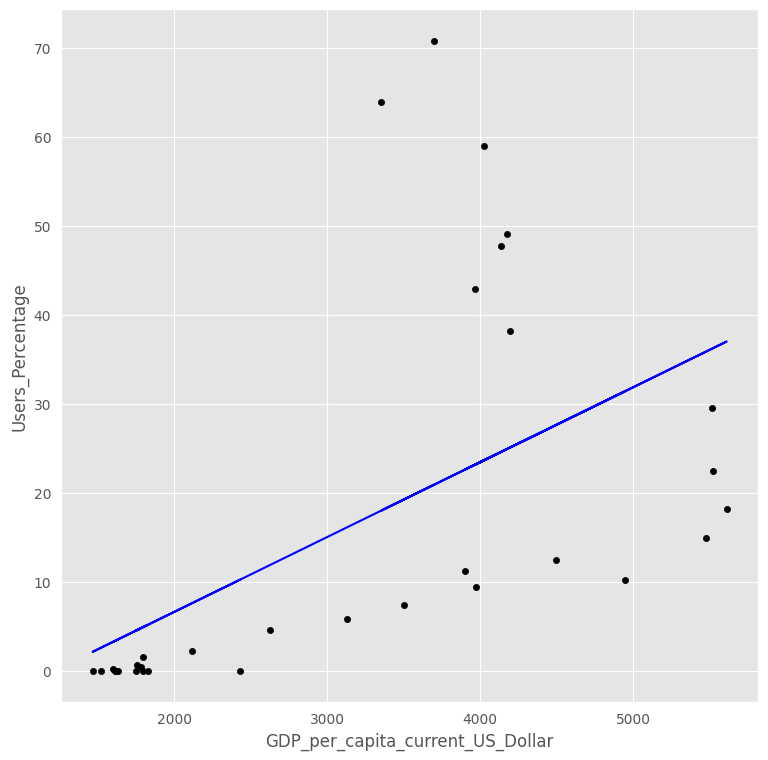

In [33]:
Indic_df.plot(kind="scatter",
           x="GDP_per_capita_current_US_Dollar",
           y="Users_Percentage",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(Indic_df["GDP_per_capita_current_US_Dollar"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="b");

* The nature of the relationship is linear, with a rate of 30%. It can be expressed as follows:

**Useres Percentage = $-10.19 + 0.00841277*(GDP per Capita (current US Dollar))$**

* Whenever GDP per Capita "current US Dollar" in Algeria increases by 1 "$", the percentage of individuals who use the Internet out of the total population increases by  0.00841277%.

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #1a3d52; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #ffe81c; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Regression Analysis: Multiple linear </p>

<a id='1'></a>
## Regression Analysis: Multiple linear
<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>

In [34]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
Indic_df.describe()

,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
count,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000
mean,16.345217,3.402847e+07,2.533123e+06,1.997168e+07,3154.423049
std,21.651908,5.444793e+06,1.211562e+06,1.999630e+07,1413.127958
min,0.000000,2.551807e+07,8.120000e+05,4.700000e+02,1466.544680
25%,0.017746,2.981251e+07,1.457836e+06,1.785000e+04,1773.927637
50%,6.609964,3.319588e+07,2.574082e+06,1.732965e+07,3242.740677
75%,24.250000,3.819051e+07,3.166520e+06,4.044469e+07,4144.149662
max,70.770000,4.417797e+07,5.097059e+06,4.715426e+07,5610.733282


In [36]:
#Setting the value for X and Y
X = Indic_df[['Total_population','Fixed_telephone_subscriptions', 'Mobile_phone_subscriptions', 'GDP_per_capita_current_US_Dollar']]
y = Indic_df['Users_Percentage']

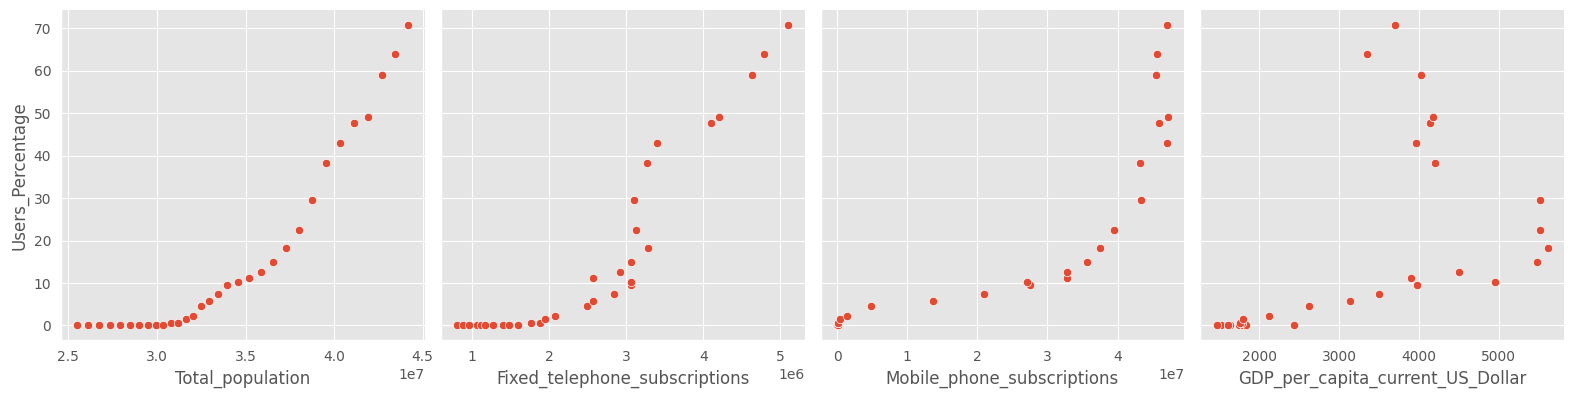

In [37]:
sns.pairplot(Indic_df, x_vars=['Total_population','Fixed_telephone_subscriptions', 'Mobile_phone_subscriptions', 'GDP_per_capita_current_US_Dollar'],
             y_vars='Users_Percentage', height=4, aspect=1, kind='scatter')
plt.show()

In [38]:
Indic_df.corr()

,Users_Percentage,Total_population,Fixed_telephone_subscriptions,Mobile_phone_subscriptions,GDP_per_capita_current_US_Dollar
Users_Percentage,1.000000,0.923989,0.908183,0.864147,0.549066
Total_population,0.923989,1.000000,0.977937,0.941829,0.737172
Fixed_telephone_subscriptions,0.908183,0.977937,1.000000,0.913755,0.725376
Mobile_phone_subscriptions,0.864147,0.941829,0.913755,1.000000,0.869880
GDP_per_capita_current_US_Dollar,0.549066,0.737172,0.725376,0.869880,1.000000


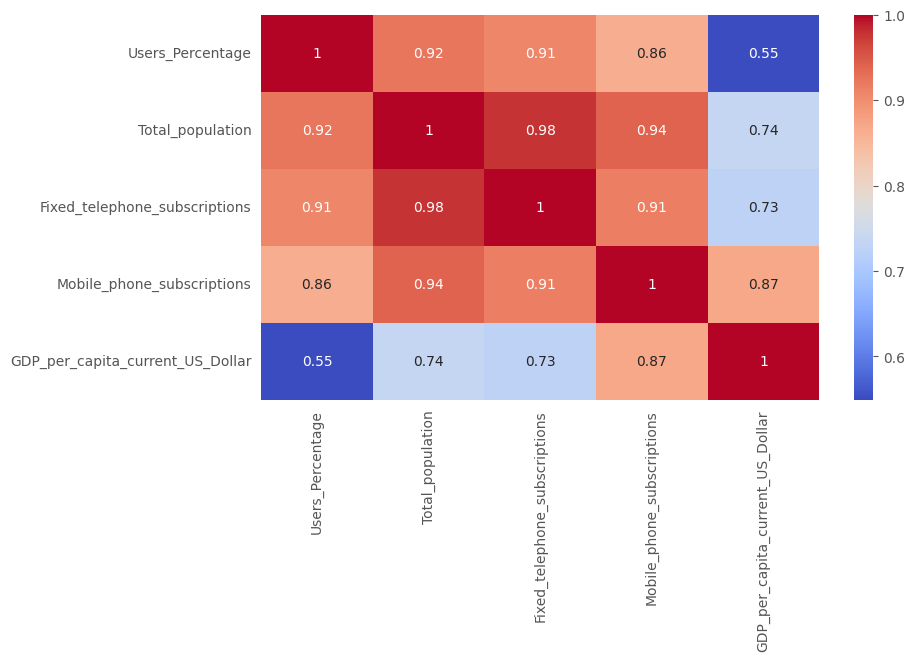

In [39]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(Indic_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

**The table above shows the Pearson correlation coefficients between various indicators and the percentage of Internet users out of the total population in Algeria with a significance value of (0.000), where all relationships were positive, with the highest correlation coefficient for the total population in Algeria with a value of 0.92, followed by fixed telephone subscriptions with a value of 0.91 and mobile phone subscriptions with a value of 0.86, then GDP per capita (current US$) of 0.55**

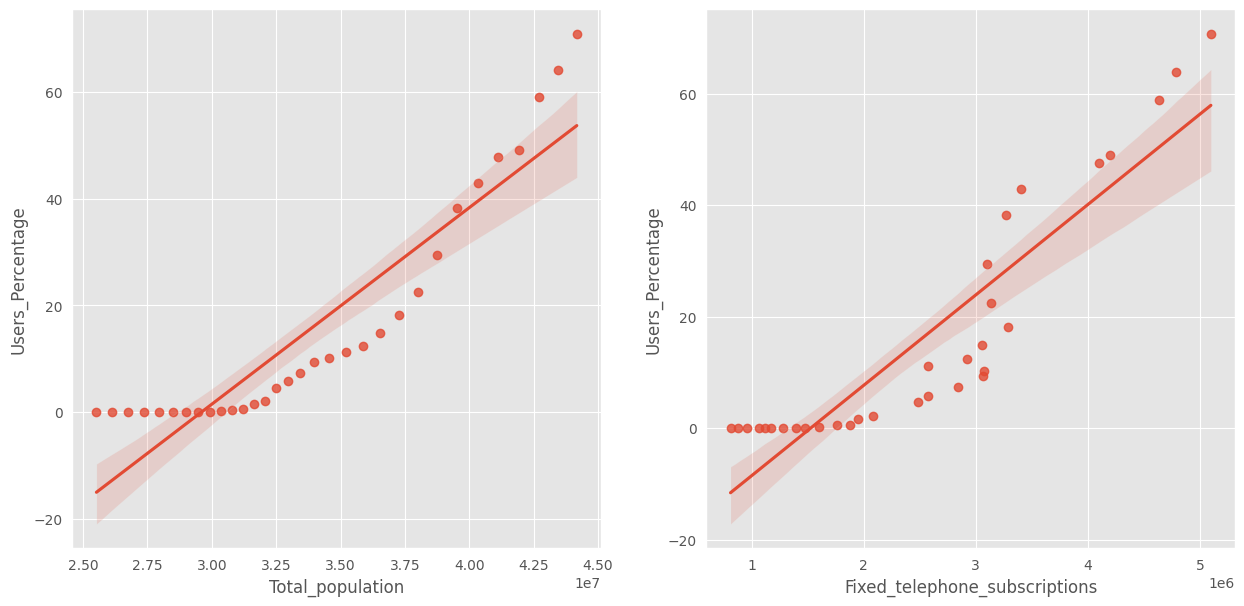

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7))
sns.regplot(x='Total_population', y='Users_Percentage', data=Indic_df, ax=axs[0])
sns.regplot(x='Fixed_telephone_subscriptions', y='Users_Percentage', data=Indic_df, ax=axs[1]);

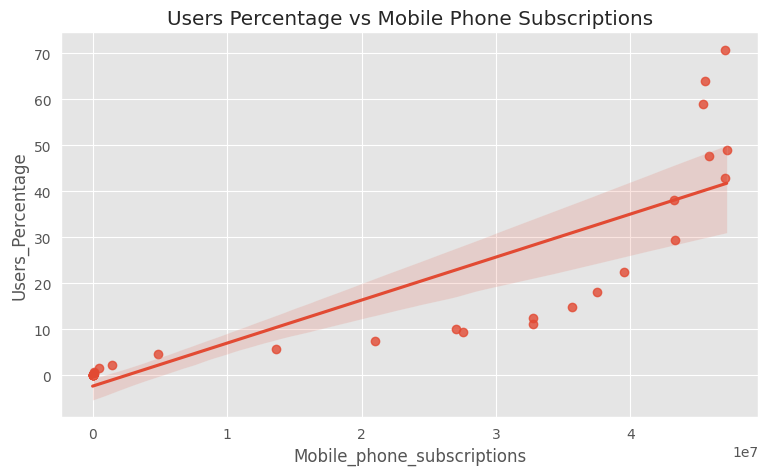

In [41]:
plt.title("Users Percentage vs Mobile Phone Subscriptions")
sns.regplot(x=Indic_df.Mobile_phone_subscriptions,y=Indic_df.Users_Percentage)
plt.show()

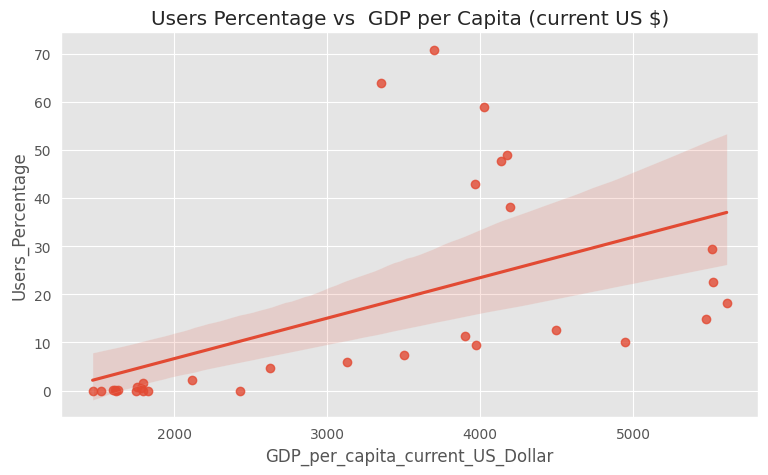

In [42]:
plt.title(r"Users Percentage vs  GDP per Capita (current US $)")
sns.regplot(x=Indic_df.GDP_per_capita_current_US_Dollar,y=Indic_df.Users_Percentage)
plt.show()

In [43]:
### X_train,  X_test,  y_train,  y_test 
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [44]:
y_train.shape

(22,)

In [45]:
y_test.shape

(10,)

In [46]:
reg_model = linear_model.LinearRegression()

In [47]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [48]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  14.383284140014801


[('Total_population', -2.3158445319801282e-07),
 ('Fixed_telephone_subscriptions', 7.847101473848617e-06),
 ('Mobile_phone_subscriptions', 1.241763571594854e-06),
 ('GDP_per_capita_current_US_Dollar', -0.010940772809469338)]

**The correlation between the percentage of Internet users out of the total population in Algeria and the total population, fixed telephone subscriptions, mobile phone subscriptions, and per capita GDP (in current US dollars) can be expressed as follows:**


**Useres Percentage** = $14.38$ - $2.32 * 10^{-7}$ (Total Population) + $7.85 * 10^{-6}$ (Fixed Telephone Subscriptions) + $1.24 * 10^{-6}$ (Mobile Phone Subscriptions) - $0.011$ * (GDP per Capita in current US_$)

In [49]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [50]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
Year,,
2003,2.195360,1.912003
2018,49.038468,50.550515
1991,0.000000,-3.871594
2016,42.945527,46.768378
1995,0.001769,0.979581
2008,10.180000,9.908821
2019,58.977575,53.274054
2007,9.451191,21.363058
1996,0.001739,-0.003804


In [51]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 3.0624038640650912
Mean Square Error: 21.254933719371756
Root Mean Square Error: 4.610307334589718


<a id='1'></a>
# 4 | Explore Patterns

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>



* Predicted Percentage of Internet users out of the total population in Algeria; It takes an almost increasing pattern over the years
* It can be expressed by the following equation:**

----------

$Y = 14.38 - 2.32 * 10^{-7} (x_{1}) + 7.85 * 10^{-6} (x_{2}) + 1.24* 10^{-6} (x_{3}) - 0.011 * (x_{4})$

----------

$Y$ =  Predicted Percentage of Internet users out of the total population in Algeria

$x_{1}$ = Total Population

$x_{2}$ = Fixed Telephone Subscriptions

$x_{3}$ = Mobile Phone Subscriptions

$x_{4}$ = GDP per Capita in current US_$
